# Measure temperature-density relation in snapshots

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
import fake_spectra.tempdens as fake_tdr
import temperature_density as tdr
import read_gadget
import json

In [2]:
basedir='/Users/font/CosmoData/test_sim_emulator/test_march_2019/'
test_snap_num=8

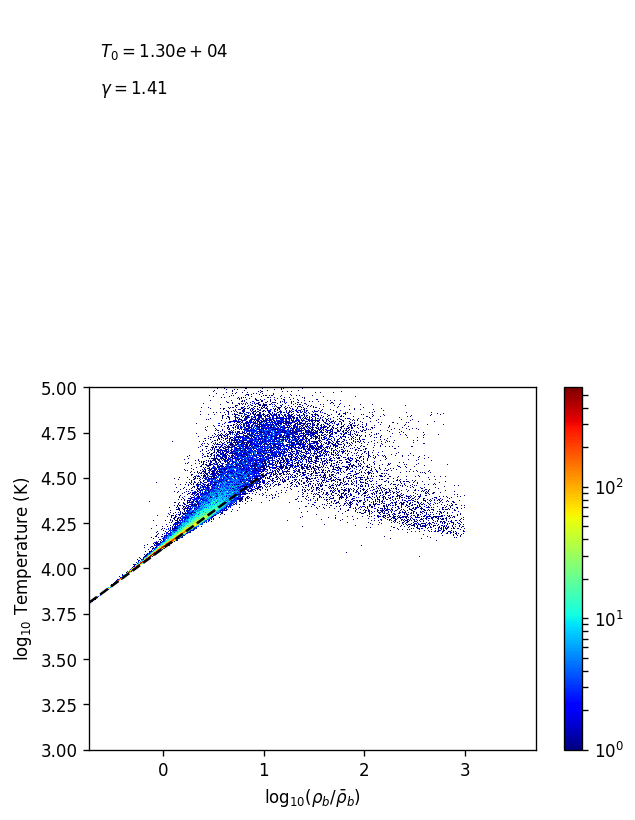

In [3]:
# try new function first
T0,gamma=fake_tdr.fit_td_rel_plot(test_snap_num, basedir+'output/', Tscale=1, gammascale=1, plot=True, use_old=False)

use old version of fit_td_rel_plot


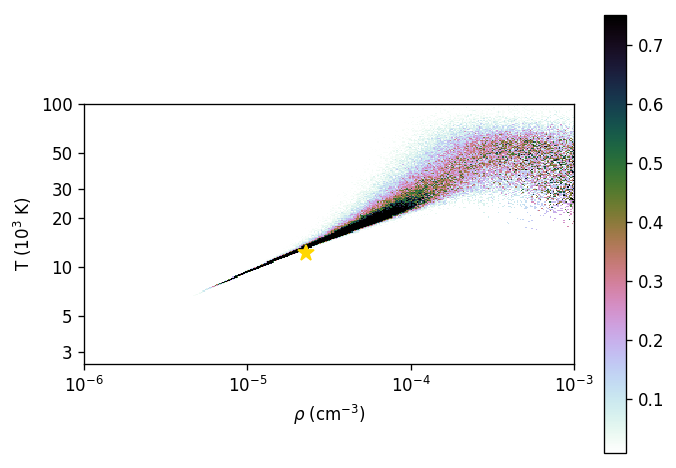

In [4]:
# try old function
T0_old,gamma_old=fake_tdr.fit_td_rel_plot(test_snap_num, basedir+'output/', Tscale=1, gammascale=1, plot=True, use_old=True)

In [5]:
print('new results',T0,gamma)
print('old results',T0_old,gamma_old)

new results 12971.8950064 1.40761802185
old results 12087.1303546 1.61230487412


### Measure TDR for all redshifts and write to JSON file

{'number': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'z': [9.0, 4.9999998800000025, 4.7500001150000024, 4.500000055000001, 4.2500000131250006, 4.0, 3.7499999050000019, 3.5000000450000002, 3.2499999575000009, 3.0, 2.7499999531250006, 2.499999947500001, 2.2499999756249998, 2.0000000029999998], 'T0': [3346.1808919330369, 9603.3986559083078, 9621.707969969324, 9814.0461730932875, 10222.363109775572, 10873.107738603865, 11798.09919931784, 12971.895006423467, 14237.53419912358, 15165.446767709889, 14805.573077340901, 13676.394987489473, 12563.267348293466, 11410.281885020289], 'gamma': [1.2729615171203112, 1.3876319001274269, 1.3924988282938227, 1.3918302779250766, 1.3875874383376552, 1.3866406513573954, 1.3914301317357065, 1.4076180218479639, 1.4341519307036483, 1.4656367917472988, 1.4896197702188765, 1.5038761207520639, 1.5193461011302682, 1.529640409558721], 'zmax': 20}


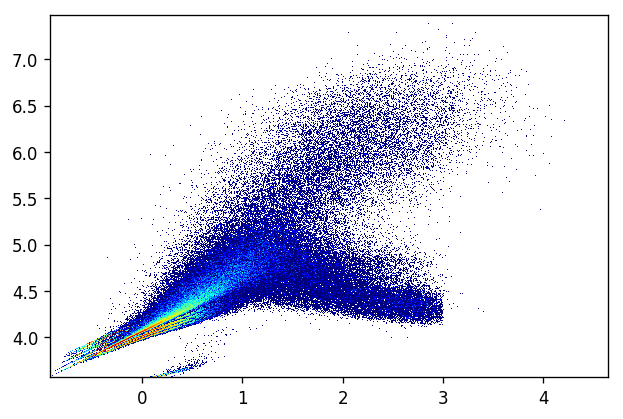

In [6]:
thermal_info=tdr.compute_TDR(basedir)
print(thermal_info)

In [7]:
filename='thermal_history.json'
json_file = open(filename,"w")
json.dump(thermal_info,json_file)
json_file.close()

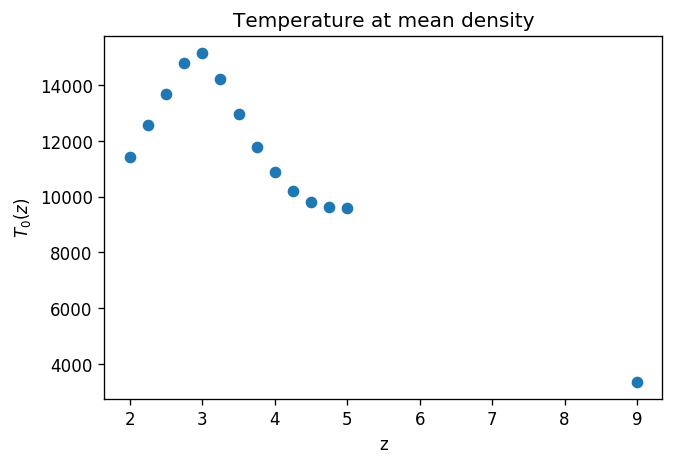

In [8]:
plt.plot(np.array(thermal_info['z']),np.array(thermal_info['T0']),'o')
plt.xlabel('z')
plt.ylabel(r'$T_0(z)$')
plt.title('Temperature at mean density')

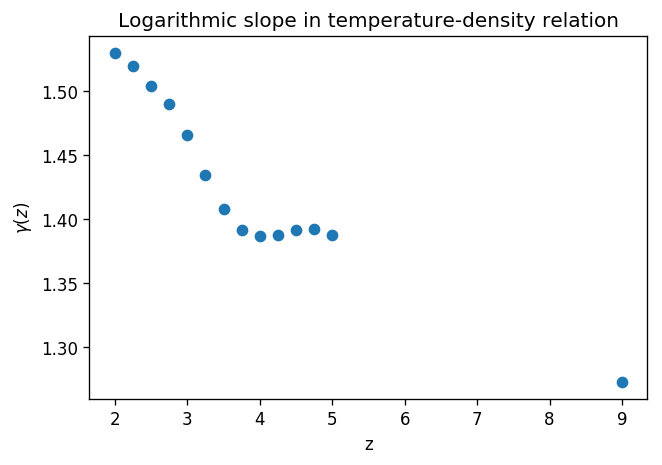

In [9]:
plt.plot(np.array(thermal_info['z']),np.array(thermal_info['gamma']),'o')
plt.xlabel('z')
plt.ylabel(r'$\gamma(z)$')
plt.title('Logarithmic slope in temperature-density relation')